In [2]:
import tensorflow as tf
from tensorflow.python.keras.datasets.fashion_mnist import load_data
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import to_categorical

In [3]:
history = TensorBoard(log_dir='./fashion_mnist_logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False)

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
labels = {
        0: "T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress",  4:"Coat", 
        5:"Sandal",  6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

In [8]:
def image(index):
        plt.imshow(x_train[index], cmap="gray")
        plt.title(labels[y_train[index]])

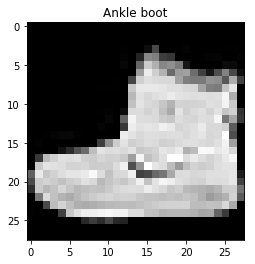

In [9]:
image(0)

In [10]:
# Convert type and normalize to (0,1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [11]:
# Flatten the data from (60000, 28, 28) to (60000, 784)
x_train_flatten = x_train.reshape(60000, 28*28)
x_test_flatten = x_test.reshape(10000, 28*28)

In [3]:
Dense?

Init signature: Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: if the input to the layer has a rank greater than 2, then
it is flattened prior to the initial dot product with `kernel`.

Example:

```python
    # as first layer in a sequential model:
    model = Sequential()
    model.add(Dense(32, input_shape=(16,)))
    # now the model will take as input arrays of shape (*, 16)
    # and output arrays of shape (

In [12]:
model1 = Sequential()
model1.add(Dense(100, input_shape=(784,), activation="relu"))
model1.add(Dense(10, activation="softmax"))

In [13]:
model1.compile(loss='categorical_crossentropy',
                     optimizer="sgd",
                     metrics=['accuracy'])

In [14]:
# Convert class vector to binary class matrices
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

In [21]:
%time
model1.fit(x_train_flatten, y_train_class, batch_size=128, epochs=100, verbose=1, validation_split=0.2, callbacks=[history])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================]48000/48000 [==============================] - 1s 19us/step - loss: 0.3073 - acc: 0.8921 - val_loss: 0.3516 - val_acc: 0.8782

Epoch 2/100
48000/48000 [==============================]48000/48000 [==============================] - 1s 19us/step - loss: 0.3064 - acc: 0.8938 - val_loss: 0.3524 - val_acc: 0.8775

Epoch 3/100
48000/48000 [==============================]48000/48000 [==============================] - 1s 19us/step - loss: 0.3058 - acc: 0.8933 - val_loss: 0.3518 - val_acc: 0.8777

Epoch 4/100
48000/48000 [==============================]48000/48000 [==============================] - 1s 19us/step - loss: 0.3051 - acc: 0.8933 - val_loss: 0.3503 - val_acc: 0.8780

Epoch 5/100
48000/48000 [==============================]48000/48000 [==============================] - 1s 20us/step - loss: 0.3041 - acc: 0.8937 - val_loss

In [22]:
score = model1.evaluate(x_test_flatten, y_test_class)

10000/10000 [==============================]10000/10000 [==============================] - 0s 25us/step



In [23]:
score

[0.36228553161621097, 0.8717]

In [28]:
index = 8898

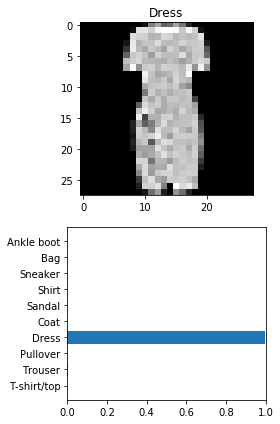

In [29]:
label_array = ["T-shirt/top", "Trouser", "Pullover", "Dress",  "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
proba = model1.predict_proba(x_test_flatten)
fig = plt.figure(figsize=(4, 6)) 
plt.subplot(211)
plt.imshow(x_test[index], cmap="gray")
plt.title(label_array[y_test[index]])

plt.subplot(212)
plt.barh(y=range(len(proba[index])), width=proba[index], tick_label=label_array)
plt.xlim(0,1)

plt.tight_layout()